In [32]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/stephen/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [1]:
import os
import pickle
import PIL.Image
import numpy as np
import dnnlib
import dnnlib.tflib as tflib
import config
from encoder.generator_model import Generator

import matplotlib.pyplot as plt
%matplotlib inline

W1019 10:48:32.687433 140143508735744 deprecation_wrapper.py:119] From /home/stephen/stylegan-encoder/dnnlib/tflib/tfutil.py:34: The name tf.Dimension is deprecated. Please use tf.compat.v1.Dimension instead.

W1019 10:48:32.688183 140143508735744 deprecation_wrapper.py:119] From /home/stephen/stylegan-encoder/dnnlib/tflib/tfutil.py:74: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1019 10:48:32.688679 140143508735744 deprecation_wrapper.py:119] From /home/stephen/stylegan-encoder/dnnlib/tflib/tfutil.py:128: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



In [2]:
import tensorflow as tf

In [3]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

get_available_gpus()

['/device:GPU:0']

In [4]:
URL_FFHQ = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'

tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

W1019 10:48:33.297731 140143508735744 deprecation_wrapper.py:119] From /home/stephen/stylegan-encoder/dnnlib/tflib/tfutil.py:97: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1019 10:48:33.298996 140143508735744 deprecation_wrapper.py:119] From /home/stephen/stylegan-encoder/dnnlib/tflib/tfutil.py:109: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.

W1019 10:48:37.150347 140143508735744 deprecation.py:323] From <string>:364: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img

def move_and_show(latent_vector, direction, coeffs):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(15, 10), dpi=80)
    for i, coeff in enumerate(coeffs):
        new_latent_vector = latent_vector.copy()
        new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
        ax[i].imshow(generate_image(new_latent_vector))
        ax[i].set_title('Coeff: %0.1f' % coeff)
    [x.axis('off') for x in ax]
    plt.show()

In [6]:
img_array = generator.generate_images()[0]

In [7]:
img_array.shape

(1024, 1024, 3)

In [8]:
# Loading already learned representations
donald_trump = np.load('ffhq_dataset/latent_representations/donald_trump_01.npy')
hillary_clinton = np.load('ffhq_dataset/latent_representations/hillary_clinton_01.npy')

# Of course you can learn your own vectors using two scripts

# 1) Extract and align faces from images
# python align_images.py raw_images/ aligned_images/

# 2) Find latent representation of aligned images
# python encode_images.py aligned_images/ generated_images/ latent_representations/

In [12]:
stephen = np.load('latent_representations/headshot_on_white_01.npy')

In [15]:
# Loading already learned latent directions
smile_direction = np.load('ffhq_dataset/latent_directions/smile.npy')
gender_direction = np.load('ffhq_dataset/latent_directions/gender.npy')
age_direction = np.load('ffhq_dataset/latent_directions/age.npy')

# In general it's possible to find directions of almost any face attributes: position, hair style or color ... 
# Additional scripts for doing so will be realised soon

### Let's think/talk about the idea of moving in latent space

In [21]:
stephen.shape, gender_direction.shape

((18, 512), (18, 512))

In [75]:
coeff=2.0
new_latent_vector = stephen.copy()
new_latent_vector = (new_latent_vector + coeff*age_direction)

In [76]:
new_latent_vector.shape

(18, 512)

In [77]:
new_im=generate_image(new_latent_vector)

(-0.5, 1023.5, 1023.5, -0.5)

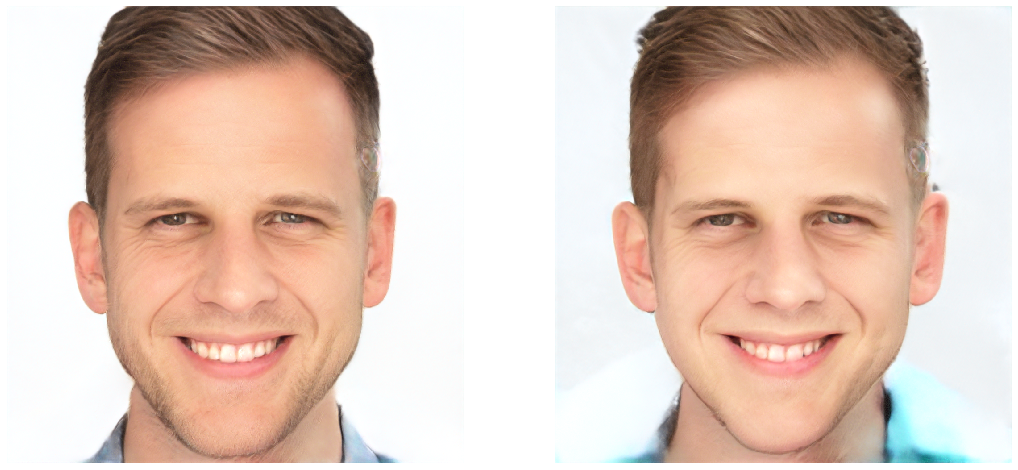

In [78]:
fig = figure(0, (18, 9))
fig.add_subplot(121); imshow(generate_image(stephen)); axis('off')
fig.add_subplot(122); imshow(new_im); axis('off')

(-0.5, 1023.5, 1023.5, -0.5)

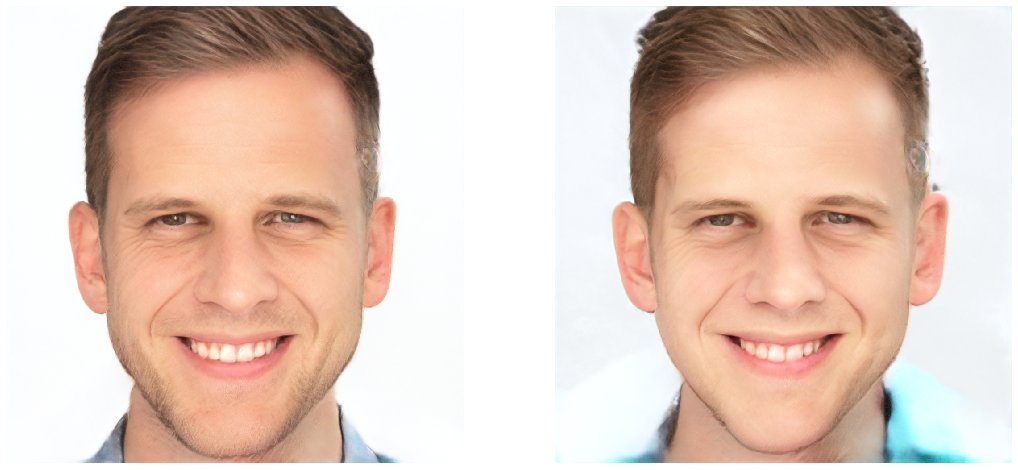

In [79]:
coeff=2.0
new_latent_vector = stephen.copy()
new_latent_vector= (new_latent_vector + coeff*age_direction)

new_im=generate_image(new_latent_vector)

fig = figure(0, (18, 9))
fig.add_subplot(121); imshow(generate_image(stephen)); axis('off')
fig.add_subplot(122); imshow(new_im); axis('off')

### Smile transformation

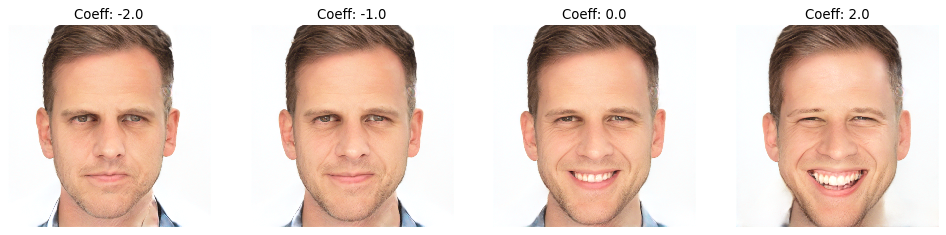

In [16]:
move_and_show(stephen, smile_direction, [-2, -1, 0, 2])

### Gender transformation

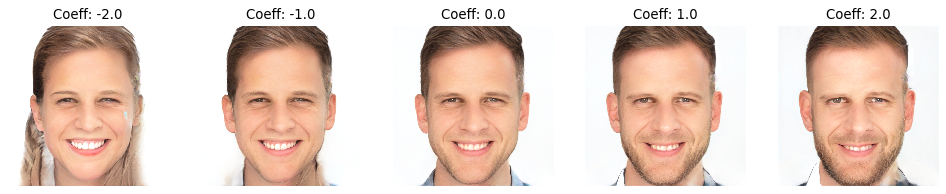

In [17]:
move_and_show(stephen, gender_direction, [-2, -1, 0, 1, 2])

### Age transformation

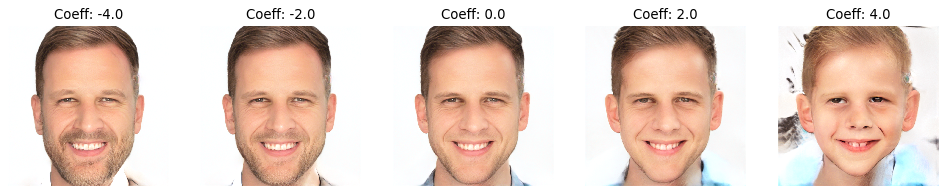

In [18]:
move_and_show(stephen, age_direction, [-4, -2, 0, 2, 4])

### Latent Space Interpolations

In [51]:
from matplotlib.pyplot import *
from pathlib import Path
from tqdm import tqdm

100it [00:56,  1.75it/s]


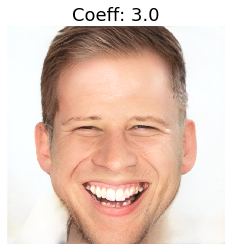

In [54]:
latent_vector = stephen
direction = smile_direction
p = Path('exports/stephen_one')

for i, coeff in tqdm(enumerate(np.linspace(-3, 3, 100))):
    new_latent_vector = latent_vector.copy()
    new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
    
    clf()
    imshow(generate_image(new_latent_vector)); axis('off')
    title('Coeff: %0.1f' % coeff, fontsize = 18)
    savefig(str(p/'smile'/('smile' + str(i).zfill(3) + '.png')), dpi = 200)




  0%|          | 0/250 [00:00<?, ?it/s]


  0%|          | 1/250 [00:00<03:40,  1.13it/s]


  1%|          | 2/250 [00:01<03:34,  1.16it/s]


  1%|          | 3/250 [00:02<03:33,  1.15it/s]


  2%|▏         | 4/250 [00:03<03:29,  1.17it/s]


  2%|▏         | 5/250 [00:04<03:31,  1.16it/s]


  2%|▏         | 6/250 [00:05<03:40,  1.11it/s]


  3%|▎         | 7/250 [00:06<03:50,  1.06it/s]


  3%|▎         | 8/250 [00:07<03:39,  1.10it/s]


  4%|▎         | 9/250 [00:08<03:45,  1.07it/s]


  4%|▍         | 10/250 [00:08<03:37,  1.10it/s]


  4%|▍         | 11/250 [00:09<03:36,  1.10it/s]


  5%|▍         | 12/250 [00:10<03:30,  1.13it/s]


  5%|▌         | 13/250 [00:11<03:34,  1.10it/s]


  6%|▌         | 14/250 [00:12<03:27,  1.14it/s]


  6%|▌         | 15/250 [00:13<03:29,  1.12it/s]


  6%|▋         | 16/250 [00:14<03:24,  1.15it/s]


  7%|▋         | 17/250 [00:15<03:23,  1.15it/s]


  7%|▋         | 18/250 [00:15<03:18,  1.17it/s]


  8%|▊         | 19/250 [00:16<03:17,  1.17it/

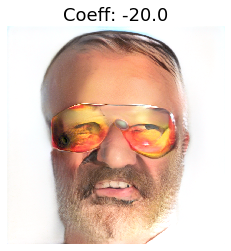

In [95]:
latent_vector = stephen
direction = age_direction
p = Path('exports/stephen_one')

for i, coeff in enumerate(tqdm(np.linspace(5, -20, 250))):
    new_latent_vector = latent_vector.copy()
    new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
    
    clf()
    imshow(generate_image(new_latent_vector)); axis('off')
    title('Coeff: %0.1f' % coeff, fontsize = 18)
    savefig(str(p/'age'/('age' + str(i).zfill(3) + '.png')), dpi = 200)

100%|██████████| 100/100 [00:53<00:00,  1.75it/s]


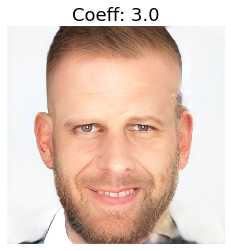

In [53]:
latent_vector = stephen
direction = gender_direction
p = Path('exports/stephen_one')

for i, coeff in enumerate(tqdm(np.linspace(-3, 3, 100))):
    new_latent_vector = latent_vector.copy()
    new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
    
    clf()
    imshow(generate_image(new_latent_vector)); axis('off')
    title('Coeff: %0.1f' % coeff, fontsize = 18)
    savefig(str(p/'gender'/('gender' + str(i).zfill(3) + '.png')), dpi = 200)

-- Ok, one more thing I would like to try in the backtround today!

In [85]:
random_directions = np.load('exports/random_directions/random_directions.npy')

In [87]:
random_directions.shape

(2500, 9216)




  0%|          | 0/2500 [00:00<?, ?it/s]


  0%|          | 1/2500 [00:00<20:51,  2.00it/s]


  0%|          | 2/2500 [00:00<20:32,  2.03it/s]


  0%|          | 3/2500 [00:01<20:22,  2.04it/s]


  0%|          | 4/2500 [00:01<20:10,  2.06it/s]


  0%|          | 5/2500 [00:02<21:14,  1.96it/s]


  0%|          | 6/2500 [00:02<20:40,  2.01it/s]


  0%|          | 7/2500 [00:03<20:41,  2.01it/s]


  0%|          | 8/2500 [00:03<20:30,  2.03it/s]


  0%|          | 9/2500 [00:04<20:49,  1.99it/s]


  0%|          | 10/2500 [00:04<20:53,  1.99it/s]


  0%|          | 11/2500 [00:05<20:26,  2.03it/s]


  0%|          | 12/2500 [00:05<20:15,  2.05it/s]


  1%|          | 13/2500 [00:06<20:27,  2.03it/s]


  1%|          | 14/2500 [00:06<20:17,  2.04it/s]


  1%|          | 15/2500 [00:07<20:45,  2.00it/s]


  1%|          | 16/2500 [00:07<20:54,  1.98it/s]


  1%|          | 17/2500 [00:08<20:44,  2.00it/s]


  1%|          | 18/2500 [00:08<20:29,  2.02it/s]


  1%|          | 19/2500 [0

  5%|▌         | 134/2500 [01:07<20:23,  1.93it/s]


  5%|▌         | 135/2500 [01:07<20:11,  1.95it/s]


  5%|▌         | 136/2500 [01:08<19:47,  1.99it/s]


  5%|▌         | 137/2500 [01:08<19:24,  2.03it/s]


  6%|▌         | 138/2500 [01:09<19:39,  2.00it/s]


  6%|▌         | 139/2500 [01:09<19:33,  2.01it/s]


  6%|▌         | 140/2500 [01:10<19:15,  2.04it/s]


  6%|▌         | 141/2500 [01:10<19:20,  2.03it/s]


  6%|▌         | 142/2500 [01:11<19:30,  2.01it/s]


  6%|▌         | 143/2500 [01:11<19:37,  2.00it/s]


  6%|▌         | 144/2500 [01:12<19:28,  2.02it/s]


  6%|▌         | 145/2500 [01:12<19:11,  2.04it/s]


  6%|▌         | 146/2500 [01:12<19:02,  2.06it/s]


  6%|▌         | 147/2500 [01:13<18:48,  2.08it/s]


  6%|▌         | 148/2500 [01:13<19:06,  2.05it/s]


  6%|▌         | 149/2500 [01:14<19:00,  2.06it/s]


  6%|▌         | 150/2500 [01:14<19:14,  2.04it/s]


  6%|▌         | 151/2500 [01:15<19:02,  2.06it/s]


  6%|▌         | 152/2500 [01:15<19:08,  2.04i

 16%|█▌        | 398/2500 [03:22<18:32,  1.89it/s]


 16%|█▌        | 399/2500 [03:22<18:29,  1.89it/s]


 16%|█▌        | 400/2500 [03:23<18:39,  1.88it/s]


 16%|█▌        | 401/2500 [03:23<18:36,  1.88it/s]


 16%|█▌        | 402/2500 [03:24<18:37,  1.88it/s]


 16%|█▌        | 403/2500 [03:24<18:28,  1.89it/s]


 16%|█▌        | 404/2500 [03:25<18:47,  1.86it/s]


 16%|█▌        | 405/2500 [03:25<19:08,  1.82it/s]


 16%|█▌        | 406/2500 [03:26<19:01,  1.84it/s]


 16%|█▋        | 407/2500 [03:26<18:59,  1.84it/s]


 16%|█▋        | 408/2500 [03:27<18:43,  1.86it/s]


 16%|█▋        | 409/2500 [03:27<18:58,  1.84it/s]


 16%|█▋        | 410/2500 [03:28<18:39,  1.87it/s]


 16%|█▋        | 411/2500 [03:29<18:36,  1.87it/s]


 16%|█▋        | 412/2500 [03:29<18:25,  1.89it/s]


 17%|█▋        | 413/2500 [03:30<18:29,  1.88it/s]


 17%|█▋        | 414/2500 [03:30<18:15,  1.90it/s]


 17%|█▋        | 415/2500 [03:31<18:11,  1.91it/s]


 17%|█▋        | 416/2500 [03:31<18:04,  1.92i

 26%|██▋       | 662/2500 [05:46<17:17,  1.77it/s]


 27%|██▋       | 663/2500 [05:47<17:24,  1.76it/s]


 27%|██▋       | 664/2500 [05:47<17:14,  1.78it/s]


 27%|██▋       | 665/2500 [05:48<17:04,  1.79it/s]


 27%|██▋       | 666/2500 [05:48<16:58,  1.80it/s]


 27%|██▋       | 667/2500 [05:49<17:07,  1.78it/s]


 27%|██▋       | 668/2500 [05:50<17:09,  1.78it/s]


 27%|██▋       | 669/2500 [05:50<17:04,  1.79it/s]


 27%|██▋       | 670/2500 [05:51<16:56,  1.80it/s]


 27%|██▋       | 671/2500 [05:51<16:54,  1.80it/s]


 27%|██▋       | 672/2500 [05:52<16:50,  1.81it/s]


 27%|██▋       | 673/2500 [05:52<17:05,  1.78it/s]


 27%|██▋       | 674/2500 [05:53<17:23,  1.75it/s]


 27%|██▋       | 675/2500 [05:53<17:23,  1.75it/s]


 27%|██▋       | 676/2500 [05:54<17:13,  1.77it/s]


 27%|██▋       | 677/2500 [05:55<17:19,  1.75it/s]


 27%|██▋       | 678/2500 [05:55<17:06,  1.77it/s]


 27%|██▋       | 679/2500 [05:56<17:08,  1.77it/s]


 27%|██▋       | 680/2500 [05:56<17:00,  1.78i

 37%|███▋      | 926/2500 [08:19<15:44,  1.67it/s]


 37%|███▋      | 927/2500 [08:20<15:32,  1.69it/s]


 37%|███▋      | 928/2500 [08:20<15:25,  1.70it/s]


 37%|███▋      | 929/2500 [08:21<15:30,  1.69it/s]


 37%|███▋      | 930/2500 [08:21<15:40,  1.67it/s]


 37%|███▋      | 931/2500 [08:22<15:29,  1.69it/s]


 37%|███▋      | 932/2500 [08:23<15:23,  1.70it/s]


 37%|███▋      | 933/2500 [08:23<15:26,  1.69it/s]


 37%|███▋      | 934/2500 [08:24<15:28,  1.69it/s]


 37%|███▋      | 935/2500 [08:24<15:21,  1.70it/s]


 37%|███▋      | 936/2500 [08:25<15:23,  1.69it/s]


 37%|███▋      | 937/2500 [08:25<15:22,  1.69it/s]


 38%|███▊      | 938/2500 [08:26<15:10,  1.71it/s]


 38%|███▊      | 939/2500 [08:27<15:02,  1.73it/s]


 38%|███▊      | 940/2500 [08:27<14:56,  1.74it/s]


 38%|███▊      | 941/2500 [08:28<14:59,  1.73it/s]


 38%|███▊      | 942/2500 [08:28<15:04,  1.72it/s]


 38%|███▊      | 943/2500 [08:29<14:59,  1.73it/s]


 38%|███▊      | 944/2500 [08:30<15:06,  1.72i

 47%|████▋     | 1187/2500 [11:00<14:05,  1.55it/s]


 48%|████▊     | 1188/2500 [11:01<14:33,  1.50it/s]


 48%|████▊     | 1189/2500 [11:02<14:42,  1.48it/s]


 48%|████▊     | 1190/2500 [11:03<14:27,  1.51it/s]


 48%|████▊     | 1191/2500 [11:03<14:18,  1.53it/s]


 48%|████▊     | 1192/2500 [11:04<14:07,  1.54it/s]


 48%|████▊     | 1193/2500 [11:04<13:59,  1.56it/s]


 48%|████▊     | 1194/2500 [11:05<13:53,  1.57it/s]


 48%|████▊     | 1195/2500 [11:06<14:02,  1.55it/s]


 48%|████▊     | 1196/2500 [11:06<14:12,  1.53it/s]


 48%|████▊     | 1197/2500 [11:07<14:18,  1.52it/s]


 48%|████▊     | 1198/2500 [11:08<13:58,  1.55it/s]


 48%|████▊     | 1199/2500 [11:08<13:52,  1.56it/s]


 48%|████▊     | 1200/2500 [11:09<13:42,  1.58it/s]


 48%|████▊     | 1201/2500 [11:10<13:40,  1.58it/s]


 48%|████▊     | 1202/2500 [11:10<13:41,  1.58it/s]


 48%|████▊     | 1203/2500 [11:11<13:47,  1.57it/s]


 48%|████▊     | 1204/2500 [11:11<13:51,  1.56it/s]


 48%|████▊     | 1205/2500 [

 58%|█████▊    | 1447/2500 [13:51<13:01,  1.35it/s]


 58%|█████▊    | 1448/2500 [13:52<12:28,  1.41it/s]


 58%|█████▊    | 1449/2500 [13:53<12:31,  1.40it/s]


 58%|█████▊    | 1450/2500 [13:53<12:09,  1.44it/s]


 58%|█████▊    | 1451/2500 [13:54<12:00,  1.46it/s]


 58%|█████▊    | 1452/2500 [13:55<11:53,  1.47it/s]


 58%|█████▊    | 1453/2500 [13:55<11:44,  1.49it/s]


 58%|█████▊    | 1454/2500 [13:56<11:35,  1.50it/s]


 58%|█████▊    | 1455/2500 [13:57<11:37,  1.50it/s]


 58%|█████▊    | 1456/2500 [13:57<11:29,  1.51it/s]


 58%|█████▊    | 1457/2500 [13:58<11:38,  1.49it/s]


 58%|█████▊    | 1458/2500 [13:59<11:38,  1.49it/s]


 58%|█████▊    | 1459/2500 [13:59<11:38,  1.49it/s]


 58%|█████▊    | 1460/2500 [14:00<11:25,  1.52it/s]


 58%|█████▊    | 1461/2500 [14:01<11:23,  1.52it/s]


 58%|█████▊    | 1462/2500 [14:01<11:15,  1.54it/s]


 59%|█████▊    | 1463/2500 [14:02<11:14,  1.54it/s]


 59%|█████▊    | 1464/2500 [14:02<11:16,  1.53it/s]


 59%|█████▊    | 1465/2500 [

 68%|██████▊   | 1707/2500 [16:53<09:07,  1.45it/s]


 68%|██████▊   | 1708/2500 [16:54<09:01,  1.46it/s]


 68%|██████▊   | 1709/2500 [16:54<08:59,  1.47it/s]


 68%|██████▊   | 1710/2500 [16:55<08:50,  1.49it/s]


 68%|██████▊   | 1711/2500 [16:56<08:45,  1.50it/s]


 68%|██████▊   | 1712/2500 [16:56<08:52,  1.48it/s]


 69%|██████▊   | 1713/2500 [16:57<08:53,  1.48it/s]


 69%|██████▊   | 1714/2500 [16:58<08:49,  1.48it/s]


 69%|██████▊   | 1715/2500 [16:58<08:51,  1.48it/s]


 69%|██████▊   | 1716/2500 [16:59<08:50,  1.48it/s]


 69%|██████▊   | 1717/2500 [17:00<08:45,  1.49it/s]


 69%|██████▊   | 1718/2500 [17:00<08:47,  1.48it/s]


 69%|██████▉   | 1719/2500 [17:01<08:48,  1.48it/s]


 69%|██████▉   | 1720/2500 [17:02<08:45,  1.48it/s]


 69%|██████▉   | 1721/2500 [17:02<08:44,  1.48it/s]


 69%|██████▉   | 1722/2500 [17:03<08:36,  1.51it/s]


 69%|██████▉   | 1723/2500 [17:04<08:37,  1.50it/s]


 69%|██████▉   | 1724/2500 [17:04<08:35,  1.51it/s]


 69%|██████▉   | 1725/2500 [

 79%|███████▊  | 1967/2500 [19:54<06:12,  1.43it/s]


 79%|███████▊  | 1968/2500 [19:54<06:10,  1.44it/s]


 79%|███████▉  | 1969/2500 [19:55<06:13,  1.42it/s]


 79%|███████▉  | 1970/2500 [19:56<06:09,  1.43it/s]


 79%|███████▉  | 1971/2500 [19:56<06:06,  1.44it/s]


 79%|███████▉  | 1972/2500 [19:57<06:03,  1.45it/s]


 79%|███████▉  | 1973/2500 [19:58<06:03,  1.45it/s]


 79%|███████▉  | 1974/2500 [19:59<06:01,  1.46it/s]


 79%|███████▉  | 1975/2500 [19:59<06:02,  1.45it/s]


 79%|███████▉  | 1976/2500 [20:00<05:58,  1.46it/s]


 79%|███████▉  | 1977/2500 [20:01<06:05,  1.43it/s]


 79%|███████▉  | 1978/2500 [20:01<06:02,  1.44it/s]


 79%|███████▉  | 1979/2500 [20:02<06:05,  1.43it/s]


 79%|███████▉  | 1980/2500 [20:03<06:04,  1.43it/s]


 79%|███████▉  | 1981/2500 [20:03<06:05,  1.42it/s]


 79%|███████▉  | 1982/2500 [20:04<06:04,  1.42it/s]


 79%|███████▉  | 1983/2500 [20:05<06:02,  1.43it/s]


 79%|███████▉  | 1984/2500 [20:06<05:59,  1.43it/s]


 79%|███████▉  | 1985/2500 [

 89%|████████▉ | 2227/2500 [23:00<03:16,  1.39it/s]


 89%|████████▉ | 2228/2500 [23:01<03:14,  1.40it/s]


 89%|████████▉ | 2229/2500 [23:01<03:17,  1.37it/s]


 89%|████████▉ | 2230/2500 [23:02<03:15,  1.38it/s]


 89%|████████▉ | 2231/2500 [23:03<03:16,  1.37it/s]


 89%|████████▉ | 2232/2500 [23:04<03:13,  1.39it/s]


 89%|████████▉ | 2233/2500 [23:04<03:11,  1.40it/s]


 89%|████████▉ | 2234/2500 [23:05<03:10,  1.40it/s]


 89%|████████▉ | 2235/2500 [23:06<03:08,  1.40it/s]


 89%|████████▉ | 2236/2500 [23:06<03:03,  1.44it/s]


 89%|████████▉ | 2237/2500 [23:07<03:05,  1.42it/s]


 90%|████████▉ | 2238/2500 [23:08<03:03,  1.43it/s]


 90%|████████▉ | 2239/2500 [23:08<03:05,  1.41it/s]


 90%|████████▉ | 2240/2500 [23:09<03:04,  1.41it/s]


 90%|████████▉ | 2241/2500 [23:10<03:03,  1.41it/s]


 90%|████████▉ | 2242/2500 [23:11<03:00,  1.43it/s]


 90%|████████▉ | 2243/2500 [23:11<03:02,  1.41it/s]


 90%|████████▉ | 2244/2500 [23:12<02:59,  1.43it/s]


 90%|████████▉ | 2245/2500 [

 99%|█████████▉| 2487/2500 [26:07<00:09,  1.39it/s]


100%|█████████▉| 2488/2500 [26:08<00:08,  1.40it/s]


100%|█████████▉| 2489/2500 [26:08<00:08,  1.36it/s]


100%|█████████▉| 2490/2500 [26:09<00:08,  1.25it/s]


100%|█████████▉| 2491/2500 [26:10<00:07,  1.27it/s]


100%|█████████▉| 2492/2500 [26:11<00:06,  1.33it/s]


100%|█████████▉| 2493/2500 [26:12<00:05,  1.35it/s]


100%|█████████▉| 2494/2500 [26:12<00:04,  1.39it/s]


100%|█████████▉| 2495/2500 [26:13<00:03,  1.37it/s]


100%|█████████▉| 2496/2500 [26:14<00:02,  1.40it/s]


100%|█████████▉| 2497/2500 [26:14<00:02,  1.37it/s]


100%|█████████▉| 2498/2500 [26:15<00:01,  1.39it/s]


100%|█████████▉| 2499/2500 [26:16<00:00,  1.36it/s]


100%|██████████| 2500/2500 [26:17<00:00,  1.39it/s]

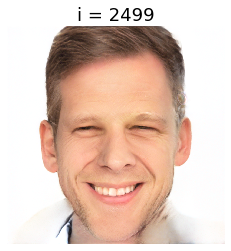

In [94]:
for i in tqdm(range(random_directions.shape[0])):
    direction = 2*random_directions[i, :].reshape(18, 512)
    new_latent_vector = latent_vector.copy()
    new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
    
    clf()
    imshow(generate_image(new_latent_vector)); axis('off')
    title('i = ' + str(i), fontsize = 18)
    savefig('exports/random_directions/' + str(i).zfill(3) + '.png', dpi = 100)